### **PROJECT BIG DATA**
**Nama : Vania Amelia Setya Wijaya**

**NPM  : 2330506068**

**Link Datase**: https://www.kaggle.com/datasets/davidcariboo/player-scores

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


- **Membaca Dataset**

In [30]:
df = pd.read_csv('/content/drive/MyDrive/club_games.csv')
columns = ['games_id', 'club_id', 'own_goals', 'own_position', 'own_manager_name', 'oponent_id', 'opponent_goals', 'opponent_position ', 'opponent_manager_name', 'hosting', 'is_win' ]
df.head()

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320454,222,0,NaN,Volkan Uluc,79,2,NaN,Bruno Labbadia,Home,0
2,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
3,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
4,2321027,33,3,8.0,Jens Keller,41,3,9.0,Thorsten Fink,Home,0


In [31]:
# Mengecek Nilai NaN Pada DataFrame
df.isna().sum()

,0
game_id,0
club_id,0
own_goals,0
own_position,43964
own_manager_name,1632
opponent_id,0
opponent_goals,0
opponent_position,43964
opponent_manager_name,1632
hosting,0


In [32]:
# Menggunakan LabelEncoder untuk mengonversi fitur kategori menjadi numerik
label_encoder = LabelEncoder()
# Mengonversi fitur kategori
df['own_manager_name'] = label_encoder.fit_transform(df['own_manager_name'].astype(str))
df['opponent_manager_name'] = label_encoder.fit_transform(df['opponent_manager_name'].astype(str))
df['hosting'] = label_encoder.fit_transform(df['hosting'].astype(str))

# Output DataFrame tanpa nilai kosong
print(df.isna().sum())

game_id                      0
club_id                      0
own_goals                    0
own_position             43964
own_manager_name             0
opponent_id                  0
opponent_goals               0
opponent_position        43964
opponent_manager_name        0
hosting                      0
is_win                       0
dtype: int64


In [33]:
df.isnull().sum()

,0
game_id,0
club_id,0
own_goals,0
own_position,43964
own_manager_name,0
opponent_id,0
opponent_goals,0
opponent_position,43964
opponent_manager_name,0
hosting,0


In [34]:
# Memilih fitur yang akan digunakan (menghindari fitur yang langsung mengarah pada hasil pertandingan)
X = df[['club_id', 'own_position', 'opponent_id', 'opponent_position', 'hosting']]
y = df['is_win']

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (115057, 5)
Ukuran X_test: (28765, 5)
Ukuran y_train: (115057,)
Ukuran y_test: (28765,)


In [35]:
# Melatih model dengan RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print(f'Akurasi: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Akurasi: 0.68
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     17302
           1       0.60      0.54      0.57     11463

    accuracy                           0.68     28765
   macro avg       0.66      0.65      0.65     28765
weighted avg       0.67      0.68      0.67     28765



In [38]:
print("Hasil prediksi:")
print(y_pred[:10])

Hasil prediksi:
[0 1 0 0 1 1 1 0 0 0]


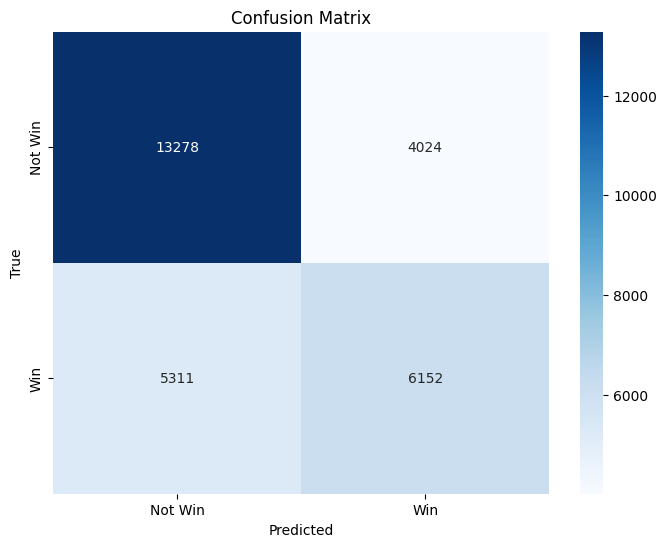

In [37]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menggunakan seaborn untuk visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'])

# Menambahkan label dan judul
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Menampilkan plot
plt.show()